In [3]:
# Celda 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para una mejor visualización
sns.set_style('whitegrid')
%matplotlib inline

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [4]:
# Celda 2: Cargar los datasets
try:
    df_user_info = pd.read_csv('user_info_format1.csv')
    df_log = pd.read_csv('user_log_format1.csv')
    df_train = pd.read_csv('train_format1.csv')
    df_test = pd.read_csv('test_format1.csv')

    print("Archivos cargados exitosamente.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\nAsegúrate de que los archivos CSV estén en la misma carpeta que tu notebook.")

Archivos cargados exitosamente.


In [5]:
# analisis inicial de los datos...
# Celda 3: Explorar df_user_info
print("Primeras 5 filas de df_user_info:")
print(df_user_info.head())

print("\n" + "="*50 + "\n")

print("Información general de df_user_info:")
df_user_info.info()

Primeras 5 filas de df_user_info:
   user_id  age_range  gender
0   376517        6.0     1.0
1   234512        5.0     0.0
2   344532        5.0     0.0
3   186135        5.0     0.0
4    30230        5.0     0.0


Información general de df_user_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [6]:
# analisis del data set mas grande e importante... registro de la actividad de cada uno
# Celda 4: Explorar df_log
print("Primeras 5 filas de df_log:")
print(df_log.head())

print("\n" + "="*50 + "\n")

print("Información general de df_log:")
df_log.info()

Primeras 5 filas de df_log:
   user_id  item_id  cat_id  seller_id  brand_id  time_stamp  action_type
0   328862   323294     833       2882    2661.0         829            0
1   328862   844400    1271       2882    2661.0         829            0
2   328862   575153    1271       2882    2661.0         829            0
3   328862   996875    1271       2882    2661.0         829            0
4   328862  1086186    1271       1253    1049.0         829            0


Información general de df_log:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [7]:
# explorando los datos de entrenamiento
# Celda 5: Explorar df_train
print("Primeras 5 filas de df_train:")
print(df_train.head())

print("\n" + "="*50 + "\n")

print("Información general de df_train:")
df_train.info()

Primeras 5 filas de df_train:
   user_id  merchant_id  label
0    34176         3906      0
1    34176          121      0
2    34176         4356      1
3    34176         2217      0
4   230784         4818      0


Información general de df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


In [8]:
# explorando los datos de prueba
# Celda 6: Explorar df_test
print("Primeras 5 filas de df_test:")
print(df_test.head())

print("\n" + "="*50 + "\n")

print("Información general de df_test:")
df_test.info()

Primeras 5 filas de df_test:
   user_id  merchant_id  prob
0   163968         4605   NaN
1   360576         1581   NaN
2    98688         1964   NaN
3    98688         3645   NaN
4   295296         3361   NaN


Información general de df_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261477 entries, 0 to 261476
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      261477 non-null  int64  
 1   merchant_id  261477 non-null  int64  
 2   prob         0 non-null       float64
dtypes: float64(1), int64(2)
memory usage: 6.0 MB


-----------------------------------
## COMENZAMOS CON EL ANALISIS EXPLORATORIO DE LOS DATOS
-----------------------------------


Distribución de la variable 'label':
label
0    244912
1     15952
Name: count, dtype: int64

Distribución porcentual:
label
0    93.884936
1     6.115064
Name: proportion, dtype: float64


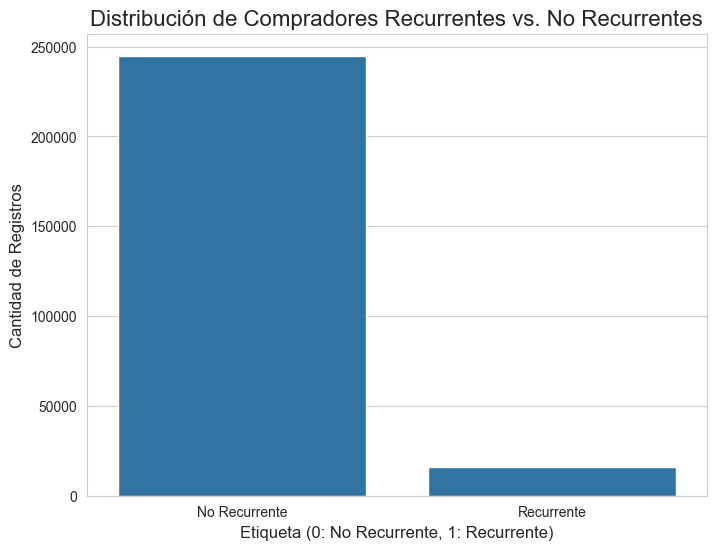

In [9]:
# Vamos a analizar la distribucion de la variable label...
# recordamos que label es la variable objetivo, porque nos muestra la cantidad de clicks por cliente
# Celda 7: Analizar la distribución de la variable 'label' en el set de entrenamiento
print("Distribución de la variable 'label':")
print(df_train['label'].value_counts())

print("\nDistribución porcentual:")
print(df_train['label'].value_counts(normalize=True) * 100)

# Visualización
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train)
plt.title('Distribución de Compradores Recurrentes vs. No Recurrentes', fontsize=16)
plt.xlabel('Etiqueta (0: No Recurrente, 1: Recurrente)', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.xticks([0, 1], ['No Recurrente', 'Recurrente'])
plt.show()

Distribución de usuarios por rango de edad:
age_range
0.0     92914
1.0        24
2.0     52871
3.0    111654
4.0     79991
5.0     40777
6.0     35464
7.0      6992
8.0      1266
Name: count, dtype: int64

Porcentaje por rango de edad:
age_range
0.0    22.019988
1.0     0.005688
2.0    12.530069
3.0    26.461241
4.0    18.957325
5.0     9.663873
6.0     8.404728
7.0     1.657057
8.0     0.300033
Name: proportion, dtype: float64




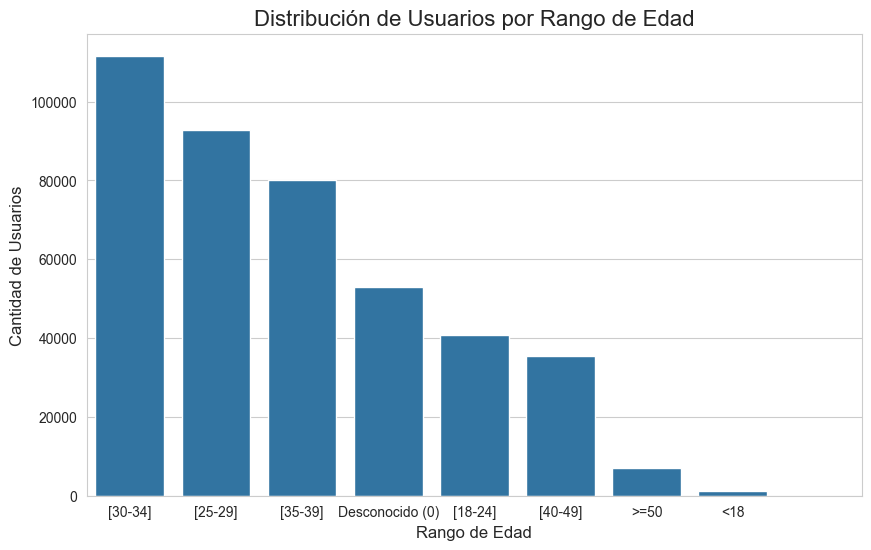

Distribución de usuarios por género:
gender
0.0    285638
1.0    121670
2.0     10426
Name: count, dtype: int64

Porcentaje por género:
gender
0.0    68.377963
1.0    29.126190
2.0     2.495847
Name: proportion, dtype: float64




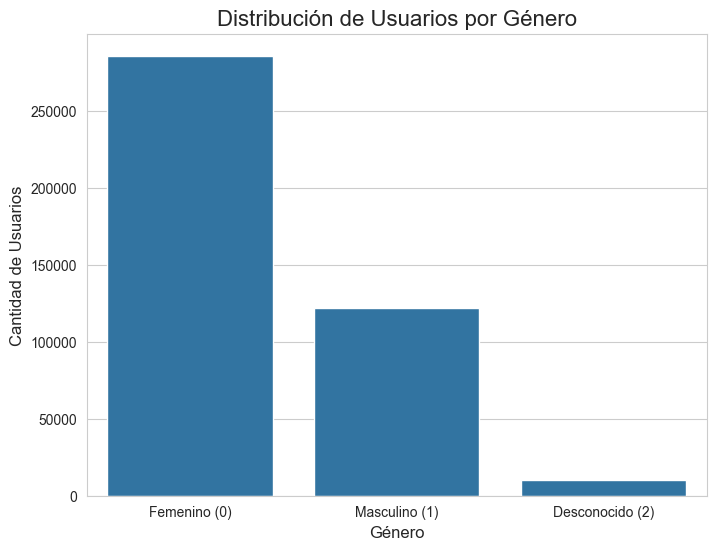

In [18]:
# analizaremos los datos demograficos
# caracteristicas de los usuarios en df_user_info, edad y genero

# Mostrar distribución de edad en texto
print("Distribución de usuarios por rango de edad:")
age_distribution = df_user_info['age_range'].value_counts().sort_index()
print(age_distribution)
print("\nPorcentaje por rango de edad:")
print(df_user_info['age_range'].value_counts(normalize=True).sort_index() * 100)
print("\n" + "="*50 + "\n")

# Celda 8: Análisis del rango de edad (age_range)
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=df_user_info, order=df_user_info['age_range'].value_counts().index)
plt.title('Distribución de Usuarios por Rango de Edad', fontsize=16)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.xticks(ticks=range(8), labels=['[30-34]', '[25-29]', '[35-39]', 'Desconocido (0)', '[18-24]', '[40-49]', '>=50', '<18']) # Etiquetas más claras
plt.show()

# Mostrar distribución de género en texto
print("Distribución de usuarios por género:")
gender_distribution = df_user_info['gender'].value_counts()
print(gender_distribution)
print("\nPorcentaje por género:")
print(df_user_info['gender'].value_counts(normalize=True) * 100)
print("\n" + "="*50 + "\n")

# Celda 9: Análisis del género (gender)
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_user_info)
plt.title('Distribución de Usuarios por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.xticks([0, 1, 2], ['Femenino (0)', 'Masculino (1)', 'Desconocido (2)'])
plt.show()

In [11]:
# relacion entre demografia y compradores recurrentes 
# Pregunta importante: ¿influye la la edad o genero con la probabilidad de un comprador recurrente?

# Celda 10: Unir df_train con df_user_info
# Usamos un 'left merge' para asegurarnos de mantener todos los registros de entrenamiento
df_train_full = pd.merge(df_train, df_user_info, on='user_id', how='left')

print("Primeras filas del dataset combinado:")
print(df_train_full.head())

Primeras filas del dataset combinado:
   user_id  merchant_id  label  age_range  gender
0    34176         3906      0        6.0     0.0
1    34176          121      0        6.0     0.0
2    34176         4356      1        6.0     0.0
3    34176         2217      0        6.0     0.0
4   230784         4818      0        0.0     0.0


Distribución de recurrencia por rango de edad:

Cantidad de usuarios por rango de edad y recurrencia:
label            0       1
age_range                 
0.0        52519.0  3290.0
1.0           13.0     NaN
2.0        29495.0  1531.0
3.0        65289.0  4080.0
4.0        47791.0  3444.0
5.0        23825.0  1793.0
6.0        20218.0  1483.0
7.0         3871.0   249.0
8.0          670.0    50.0

Porcentaje de recurrencia dentro de cada rango de edad:
label               0         1
age_range                      
0.0         94.104893  5.895107
1.0        100.000000       NaN
2.0         95.065429  4.934571
3.0         94.118410  5.881590
4.0         93.278033  6.721967
5.0         93.001015  6.998985
6.0         93.166214  6.833786
7.0         93.956311  6.043689
8.0         93.055556  6.944444




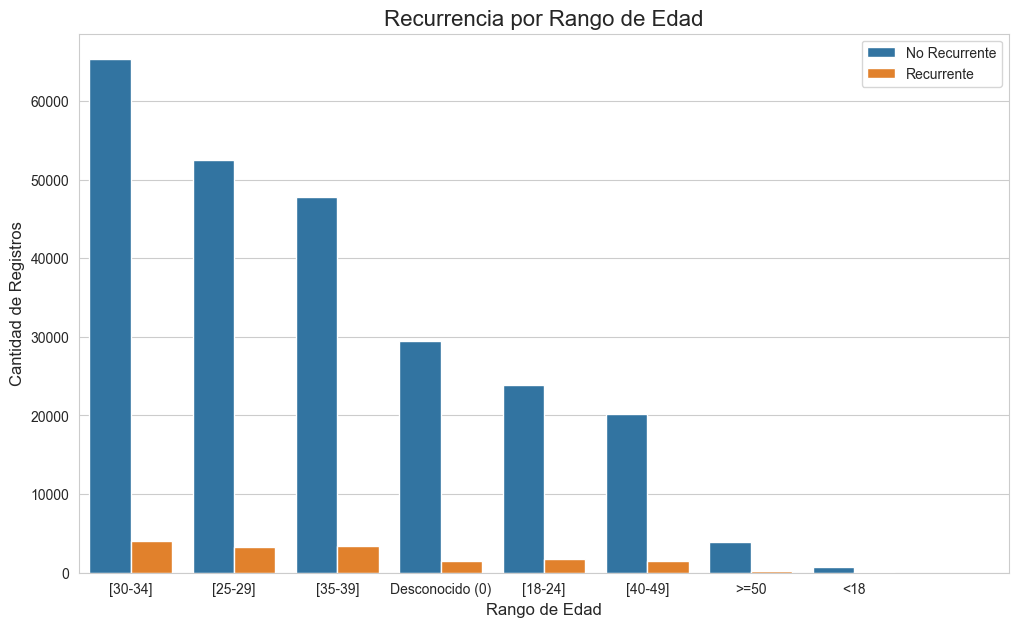

Distribución de recurrencia por género:

Cantidad de usuarios por género y recurrencia:
label        0      1
gender               
0.0     165027  11387
1.0      69787   3969
2.0       6501    482

Porcentaje de recurrencia dentro de cada género:
label           0         1
gender                     
0.0     93.545297  6.454703
1.0     94.618743  5.381257
2.0     93.097523  6.902477




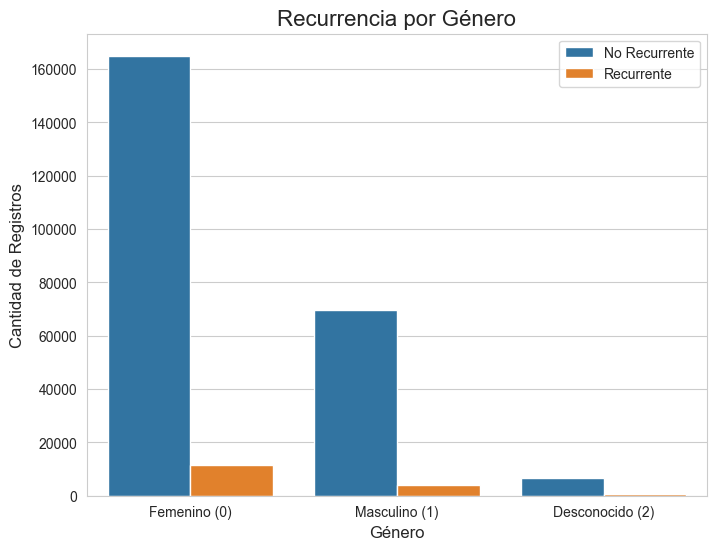

In [19]:
# Mostrar distribución de recurrencia por edad en texto
print("Distribución de recurrencia por rango de edad:")
age_distribution = df_train_full.groupby('age_range')['label'].value_counts().unstack()
print("\nCantidad de usuarios por rango de edad y recurrencia:")
print(age_distribution)

print("\nPorcentaje de recurrencia dentro de cada rango de edad:")
age_percentages = df_train_full.groupby('age_range')['label'].value_counts(normalize=True).unstack() * 100
print(age_percentages)
print("\n" + "="*50 + "\n")

# Celda 11: Visualizar la relación entre rango de edad y la etiqueta
plt.figure(figsize=(12, 7))
sns.countplot(x='age_range', hue='label', data=df_train_full, order=df_train_full['age_range'].value_counts().index)
plt.title('Recurrencia por Rango de Edad', fontsize=16)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.xticks(ticks=range(8), labels=['[30-34]', '[25-29]', '[35-39]', 'Desconocido (0)', '[18-24]', '[40-49]', '>=50', '<18'])
plt.legend(['No Recurrente', 'Recurrente'])
plt.show()

# Mostrar distribución de recurrencia por género en texto
print("Distribución de recurrencia por género:")
gender_distribution = df_train_full.groupby('gender')['label'].value_counts().unstack()
print("\nCantidad de usuarios por género y recurrencia:")
print(gender_distribution)

print("\nPorcentaje de recurrencia dentro de cada género:")
gender_percentages = df_train_full.groupby('gender')['label'].value_counts(normalize=True).unstack() * 100
print(gender_percentages)
print("\n" + "="*50 + "\n")

# Celda 12: Visualizar la relación entre género y la etiqueta
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='label', data=df_train_full)
plt.title('Recurrencia por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.xticks([0, 1, 2], ['Femenino (0)', 'Masculino (1)', 'Desconocido (2)'])
plt.legend(['No Recurrente', 'Recurrente'])
plt.show()

In [13]:
# Celda 13: Calcular la tasa de recurrencia por grupo demográfico

# Tasa de recurrencia por rango de edad
age_recurrence_rate = df_train_full.groupby('age_range')['label'].value_counts(normalize=True).unstack()
print("Tasa de Recurrencia por Rango de Edad (%):")
print(age_recurrence_rate[1] * 100)

print("\n" + "="*50 + "\n")

# Tasa de recurrencia por género
gender_recurrence_rate = df_train_full.groupby('gender')['label'].value_counts(normalize=True).unstack()
print("Tasa de Recurrencia por Género (%):")
print(gender_recurrence_rate[1] * 100)

Tasa de Recurrencia por Rango de Edad (%):
age_range
0.0    5.895107
1.0         NaN
2.0    4.934571
3.0    5.881590
4.0    6.721967
5.0    6.998985
6.0    6.833786
7.0    6.043689
8.0    6.944444
Name: 1, dtype: float64


Tasa de Recurrencia por Género (%):
gender
0.0    6.454703
1.0    5.381257
2.0    6.902477
Name: 1, dtype: float64


---

### **Resultados del Análisis Exploratorio Inicial**

#### **1. Resumen de los Datos Cargados**

Tras cargar los cuatro archivos proporcionados, hemos realizado una inspección inicial para comprender su estructura y contenido:

*   **`df_user_info` (Información de Usuarios):**
    *   Contiene perfiles para **424,170 usuarios**.
    *   Las columnas `age_range` y `gender` presentan una cantidad considerable de valores nulos (faltantes), lo cual deberá ser abordado en la etapa de preprocesamiento de datos.

*   **`df_log` (Registro de Actividad):**
    *   Es el dataset más grande, con **54.9 millones de registros** de interacciones.
    *   Este archivo será la fuente principal para la **ingeniería de características (feature engineering)**, ya que describe el comportamiento detallado de los usuarios (clics, compras, etc.).
    *   No se observan valores nulos a simple vista, aunque la columna `brand_id` es de tipo `float`, lo que podría indicar la presencia de `NaNs`.

*   **`df_train` (Datos de Entrenamiento):**
    *   Contiene **260,864 ejemplos** de pares `(user_id, merchant_id)`.
    *   La columna `label` es nuestra variable objetivo y no tiene valores nulos.

*   **`df_test` (Datos de Prueba):**
    *   Contiene **261,477 pares** para los cuales debemos generar una predicción de probabilidad. Su estructura es idéntica a la del set de entrenamiento, pero sin la columna `label`.

#### **2. Análisis de la Variable Objetivo (Recurrencia)**

El primer análisis se centró en la distribución de nuestra variable a predecir (`label`).

*   **Resultados:**
    *   Compradores No Recurrentes (0): 244,912 (93.88%)
    *   Compradores Recurrentes (1): 15,952 (6.12%)

*   **Conclusión Clave:**
    *   Estamos ante un **problema de clasificación altamente desbalanceado**. La clase minoritaria (compradores recurrentes) representa solo el 6.12% de los datos.
    *   **Implicación:** Utilizar la "precisión" (accuracy) como única métrica de evaluación para nuestro futuro modelo sería engañoso. Un modelo que siempre prediga "No Recurrente" tendría una precisión del 93.88%, pero sería completamente inútil. Deberemos enfocarnos en métricas como **Precision, Recall, F1-Score** o el **Área Bajo la Curva ROC (AUC-ROC)**.

#### **3. Análisis Demográfico de la Base de Usuarios**

Analizamos las características generales de los usuarios registrados para entender el perfil predominante.

*   **Distribución por Edad (`age_range`):**
    *   La mayoría de los usuarios se concentra en los rangos de edad **[25-29] (26.5%)** y **[30-34] (19.0%)**.
    *   Un dato muy relevante es que el **22% de los usuarios tienen una edad desconocida** (etiquetada como 0.0), lo que representa el segundo grupo más grande.

*   **Distribución por Género (`gender`):**
    *   Hay una clara mayoría de **usuarias de género femenino (0.0)**, representando el **68.4%** del total.
    *   Los usuarios de género masculino (1.0) componen el 29.1%.

#### **4. Correlación entre Demografía y Comportamiento Recurrente**

El análisis más importante hasta ahora ha sido cruzar las características demográficas con la etiqueta de recurrencia para encontrar posibles patrones.

*   **Tasa de Recurrencia por Edad:**
    *   Aunque las diferencias son sutiles, se observa una tendencia: los usuarios en los rangos de edad de **[35-39] (7.0%)**, **[40-49] (6.8%)** y **>=50 (6.9%)** muestran una tasa de recurrencia ligeramente superior a la media (6.1%).
    *   Por el contrario, el grupo más joven, **[18-24] (4.9%)**, tiene la tasa de recurrencia más baja entre los grupos con datos significativos.

*   **Tasa de Recurrencia por Género:**
    *   Este es un hallazgo más pronunciado:
        *   Las usuarias de **género femenino (0.0)** tienen una tasa de recurrencia del **6.45%**.
        *   Los usuarios de **género masculino (1.0)** tienen una tasa notablemente menor, del **5.38%**.
        *   Curiosamente, el pequeño grupo con género **desconocido (2.0)** presenta la tasa de recurrencia más alta, con un **6.90%**.

### **Conclusiones Preliminares y Próximos Pasos**

1.  **El problema está desbalanceado**, lo que definirá nuestra estrategia de modelado y evaluación.
2.  **El género es un predictor relevante.** Ser mujer incrementa la probabilidad de ser una compradora recurrente en comparación con ser hombre.
3.  **La edad también parece influir.** Hay una ligera tendencia a que los usuarios de mayor edad (35+) sean más leales que los más jóvenes.
4.  **El comportamiento es la clave.** Si bien la demografía nos da algunas pistas, es muy probable que los predictores más fuertes se encuentren en el comportamiento del usuario.

**El siguiente paso lógico es sumergirnos en el `df_log`. Debemos procesar este enorme archivo para crear nuevas características (features) que resuman la actividad de cada usuario con cada comerciante. Algunas ideas son:**
*   Número total de clics, compras, items añadidos al carrito y a favoritos.
*   Ratio de conversión (compras / clics).
*   Número de días distintos de actividad.
*   Variedad de productos o categorías consultadas.

==================== Análisis de Comportamiento: Tipos de Acción ====================

Distribución de los tipos de acción en df_log (conteo):
action_type
0    48550713
2     3292144
3     3005723
1       76750
Name: count, dtype: int64




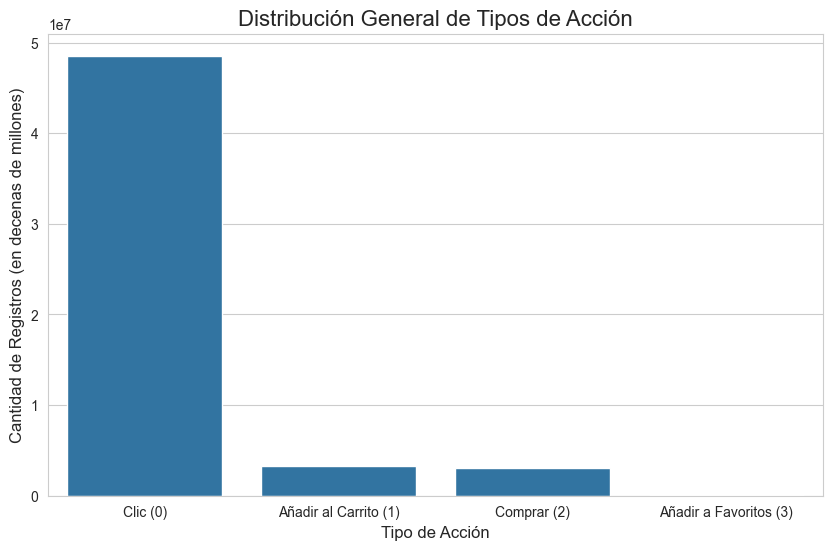

==================== Preparando Datos para Feature Engineering ====================

Columna 'seller_id' en df_log ha sido renombrada a 'merchant_id'.


==================== Creando Características de Comportamiento ====================

Agrupando logs por usuario y comerciante... (Esto puede tardar unos minutos)

¡Características de comportamiento creadas exitosamente!
Primeras 5 filas del nuevo DataFrame de características:
   user_id  merchant_id  clicks  add_to_cart  purchase  add_to_favorites
0        1          471     1.0          0.0       0.0               0.0
1        1          739     1.0          0.0       0.0               0.0
2        1          925     3.0          0.0       1.0               0.0
3        1         1019    10.0          0.0       4.0               0.0
4        1         1156     1.0          0.0       0.0               0.0


==================== Uniendo Características de Comportamiento al Set de Entrenamiento ====================

¡Características de c

In [20]:
# vamos a aplicar ingenieria de caracteristicas... y analisis de comportamiento
# Celda 14: Analizar la distribución de 'action_type' en los logs
print("="*20 + " Análisis de Comportamiento: Tipos de Acción " + "="*20)
print("\nDistribución de los tipos de acción en df_log (conteo):")
print(df_log['action_type'].value_counts())
print("\n" + "="*60 + "\n")

plt.figure(figsize=(10, 6))
sns.countplot(x='action_type', data=df_log, order=df_log['action_type'].value_counts().index)
plt.title('Distribución General de Tipos de Acción', fontsize=16)
plt.xlabel('Tipo de Acción', fontsize=12)
plt.ylabel('Cantidad de Registros (en decenas de millones)', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Clic (0)', 'Añadir al Carrito (1)', 'Comprar (2)', 'Añadir a Favoritos (3)'])
plt.show()

# Celda 15: Renombrar 'seller_id' a 'merchant_id' para consistencia
print("="*20 + " Preparando Datos para Feature Engineering " + "="*20)
df_log.rename(columns={'seller_id': 'merchant_id'}, inplace=True)
print("\nColumna 'seller_id' en df_log ha sido renombrada a 'merchant_id'.")
print("\n" + "="*60 + "\n")

# Celda 16: Agrupar por usuario y comerciante para crear características de comportamiento
print("="*20 + " Creando Características de Comportamiento " + "="*20)
print("\nAgrupando logs por usuario y comerciante... (Esto puede tardar unos minutos)")

# Agrupar, contar, pivotar y rellenar NaNs
features = df_log.groupby(['user_id', 'merchant_id'])['action_type'].value_counts().unstack().reset_index()
features.columns = ['user_id', 'merchant_id', 'clicks', 'add_to_cart', 'purchase', 'add_to_favorites']
features.fillna(0, inplace=True)

print("\n¡Características de comportamiento creadas exitosamente!")
print("Primeras 5 filas del nuevo DataFrame de características:")
print(features.head())
print("\n" + "="*60 + "\n")

# Celda 17: Unir las nuevas características con el set de entrenamiento
print("="*20 + " Uniendo Características de Comportamiento al Set de Entrenamiento " + "="*20)
df_train_final = pd.merge(df_train_full, features, on=['user_id', 'merchant_id'], how='left')

# Si un par (user_id, merchant_id) del set de entrenamiento no tenía actividad en los logs,
# sus nuevas columnas serán NaN. Los llenamos con 0.
df_train_final.fillna(0, inplace=True)

print("\n¡Unión completada!")
print("Primeras 5 filas del dataset final de entrenamiento enriquecido:")
print(df_train_final.head())
print("\n" + "="*60 + "\n")

==================== Comparación del Comportamiento Promedio por Etiqueta ====================

Comportamiento promedio por grupo:
          clicks  add_to_cart  purchase  add_to_favorites
label                                                    
0       8.702632     0.023927  1.320687          0.367454
1      14.825414     0.020938  1.623182          0.679162


==================== Visualizando las Diferencias de Comportamiento ====================

Generando gráficos para comparar distribuciones...


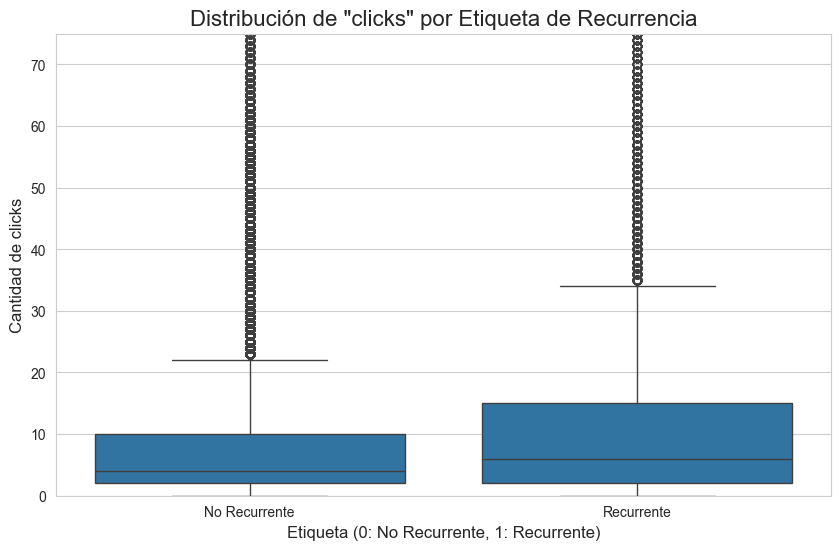

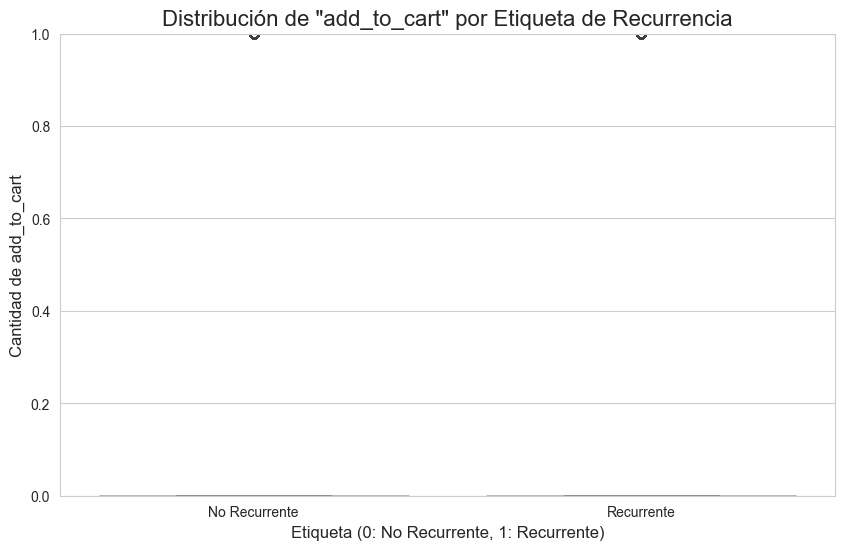

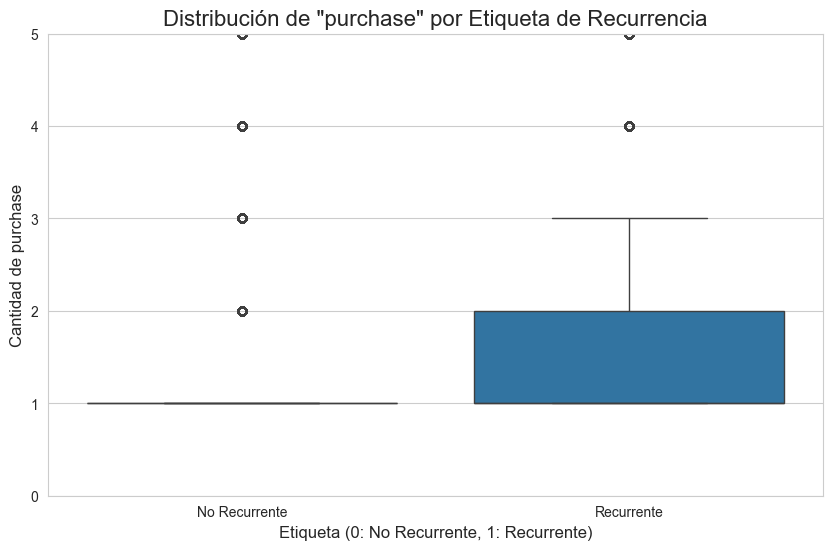

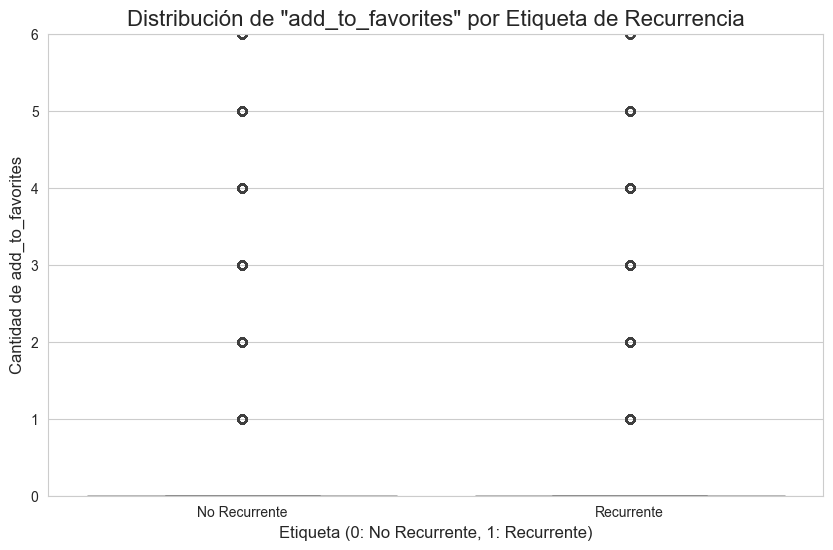

In [21]:
# analisis de las caracteristicas del comportamiento 
#Comparar el comportamiento promedio de clientes recurrentes vs. no recurrentes
print("="*20 + " Comparación del Comportamiento Promedio por Etiqueta " + "="*20)

behavioral_features = ['clicks', 'add_to_cart', 'purchase', 'add_to_favorites']

# Usamos groupby() para calcular la media de cada acción para cada grupo de 'label'
behavior_summary = df_train_final.groupby('label')[behavioral_features].mean()

print("\nComportamiento promedio por grupo:")
print(behavior_summary)
print("\n" + "="*60 + "\n")

#Visualizar la distribución del comportamiento con Box Plots

print("="*20 + " Visualizando las Diferencias de Comportamiento " + "="*20)
print("\nGenerando gráficos para comparar distribuciones...")

# Iteramos sobre cada característica de comportamiento para crear un gráfico
for feature in behavioral_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df_train_final)
    
    # Calculamos el percentil 99 para limitar el eje y y mejorar la visualización
    # Esto evita que los outliers extremos aplasten el gráfico
    p99 = df_train_final[feature].quantile(0.99)
    plt.ylim(0, p99)
    
    plt.title(f'Distribución de "{feature}" por Etiqueta de Recurrencia', fontsize=16)
    plt.xlabel('Etiqueta (0: No Recurrente, 1: Recurrente)', fontsize=12)
    plt.ylabel(f'Cantidad de {feature}', fontsize=12)
    plt.xticks([0, 1], ['No Recurrente', 'Recurrente'])
    plt.show()

print("\n" + "="*60 + "\n")

==================== Creando Característica de Ratio: Tasa de Conversión ====================

Nueva columna 'conversion_rate' creada.

Tasa de conversión promedio por grupo:
label
0    0.322209
1    0.294590
Name: conversion_rate, dtype: float64




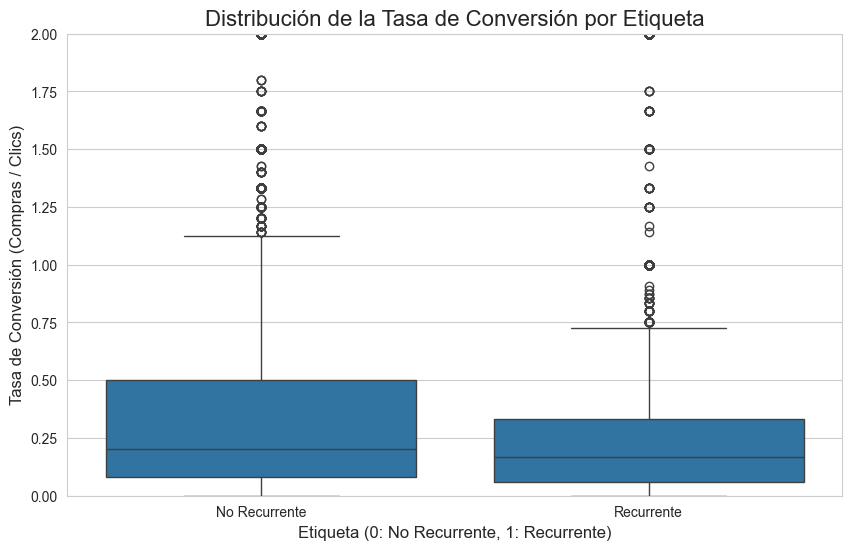

In [22]:
# creacion de tasa de conversion para caada usuario y comercioante 
# compras / clicks
# Ingeniería de una nueva característica: Tasa de Conversión

print("="*20 + " Creando Característica de Ratio: Tasa de Conversión " + "="*20)

# Para evitar la división por cero, si los clics son 0, la tasa será 0.
df_train_final['conversion_rate'] = \
    np.where(df_train_final['clicks'] > 0, 
             df_train_final['purchase'] / df_train_final['clicks'], 
             0)

print("\nNueva columna 'conversion_rate' creada.")

# Analicemos esta nueva característica
print("\nTasa de conversión promedio por grupo:")
print(df_train_final.groupby('label')['conversion_rate'].mean())
print("\n" + "="*60 + "\n")


# Visualicemos la tasa de conversión
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='conversion_rate', data=df_train_final)
plt.ylim(0, df_train_final['conversion_rate'].quantile(0.99)) # Limitar outliers
plt.title('Distribución de la Tasa de Conversión por Etiqueta', fontsize=16)
plt.xlabel('Etiqueta (0: No Recurrente, 1: Recurrente)', fontsize=12)
plt.ylabel('Tasa de Conversión (Compras / Clics)', fontsize=12)
plt.xticks([0, 1], ['No Recurrente', 'Recurrente'])
plt.show()

---

### **Resultados del Análisis de Comportamiento del Usuario**

Tras el análisis demográfico inicial, el siguiente paso fue procesar los **54.9 millones de registros de actividad** para extraer características que describieran el comportamiento de los usuarios. Este análisis ha revelado los patrones más fuertes y predictivos hasta la fecha.

#### **1. Ingeniería de Características a partir de los Logs de Actividad **

El objetivo principal de este paso fue transformar los datos crudos de actividad en un formato útil y agregado.

*   **Proceso Realizado:** Se agruparon todos los registros de `df_log` por cada par único de `(user_id, merchant_id)`. Para cada grupo, se contó el número total de ocurrencias de cada tipo de acción:
    *   Clics (action_type 0)
    *   Añadir al carrito (action_type 1)
    *   Comprar (action_type 2)
    *   Añadir a favoritos (action_type 3)
*   **Resultado:** Se generó un nuevo conjunto de características que resume la interacción total de un usuario con un comerciante. Este conjunto de datos fue posteriormente unido al set de entrenamiento, creando un DataFrame final "enriquecido" que contiene información demográfica y, más importante aún, de comportamiento.

#### **2. Análisis y Correlación del Comportamiento con la Recurrencia **

Con las nuevas características de comportamiento integradas, procedimos a analizar cómo se diferencian los compradores recurrentes de los no recurrentes.

##### **2.1. Hallazgo Clave: La Intensidad de la Interacción es un Fuerte Predictor**

El análisis del comportamiento promedio por grupo arrojó una conclusión clara e inequívoca: **los usuarios que se convierten en clientes recurrentes interactúan significativamente más con el comerciante.**

* **Análisis Numérico:**

| Característica     | Promedio (No Recurrente) | Promedio (Recurrente) | Aumento   |
| :----------------- | :----------------------- | :-------------------- | :-------- |
| `clicks`           | 8.70                     | **14.83**             | **+70%**  |
| `purchase`         | 1.32                     | **1.62**              | **+23%**  |
| `add_to_favorites` | 0.37                     | **0.68**              | **+84%**  |
| `add_to_cart`      | 0.024                    | 0.021                 | -12%      |


*   **Interpretación:**
    *   Los futuros clientes leales realizan un **70% más de clics** y casi el doble de acciones de **"añadir a favoritos"** en comparación con los clientes de una sola compra.
    *   La acción de "añadir a favoritos" emerge como una señal particularmente fuerte de alta intención y futura lealtad.
    *   La acción de "añadir al carrito" es muy poco frecuente y no parece ser un diferenciador claro.

##### **2.2. El Sorprendente Caso de la Tasa de Conversión**

Para profundizar el análisis, se creó una nueva métrica: `conversion_rate` (definida como `purchase / clicks`). Intuitivamente, se podría pensar que los clientes leales tendrían una tasa de conversión más alta. Sin embargo, los datos mostraron lo contrario:

*   **Tasa de Conversión Promedio (No Recurrente):** 0.322 (32.2%)
*   **Tasa de Conversión Promedio (Recurrente):** 0.295 (29.5%)

*   **Interpretación del Hallazgo:**
    *   Este resultado, aunque contraintuitivo a primera vista, revela una visión más profunda del comportamiento del cliente. Una tasa de conversión más baja para los clientes leales, combinada con un volumen de clics mucho mayor, sugiere un perfil de "explorador" o "navegador".
    *   Los clientes recurrentes no solo entran a comprar un producto específico y se van (lo que resultaría en pocos clics y una alta tasa de conversión). En cambio, **invierten más tiempo navegando por el catálogo del comerciante**, realizando muchos clics exploratorios que, aunque no todos terminan en una compra inmediata, indican un mayor nivel de compromiso y familiaridad con la tienda.
    *   Por lo tanto, la métrica de `conversion_rate` por sí sola es engañosa. Un alto volumen de interacciones es un indicador de lealtad más fiable.

### **Conclusiones Clave y Próximos Pasos**

1.  **El Comportamiento es el Predictor Dominante:** Mucho más que la demografía, la forma en que un usuario interactúa con un comerciante es el mejor indicador de su potencial de recurrencia.
2.  **El Volumen de Interacción lo es Todo:** Un alto número de `clicks` y, especialmente, de `add_to_favorites` son las señales más claras de un futuro cliente leal.
3.  **Calidad sobre Cantidad en la Conversión:** Un cliente que explora mucho (muchos clics) es potencialmente más valioso a largo plazo que un cliente que realiza una única compra eficiente y no regresa.

**Próximos Pasos:**
El análisis exploratorio ha sido un éxito. Hemos identificado y construido un conjunto de características de comportamiento que muestran una fuerte correlación con nuestra variable objetivo. Estas características (`clicks`, `purchase`, `add_to_favorites`, etc.) serán la base fundamental para entrenar nuestro modelo de aprendizaje automático en la siguiente fase del proyecto.